# 处理fastq测序文件

## 先将fastq测序文件上传至fastq/exp?/f （正向读取文件）和fastq/exp?/r （反向读取文件） 后 执行下面的代码块进行标准化重命名

In [1]:
# 配置处理路径
DES_FOLDER = "exp_vector"

In [16]:
import os

f_path = "fastq/" + DES_FOLDER + "/f"
r_path = "fastq/" + DES_FOLDER + "/r"
ffs = os.listdir(f_path)
rfs = os.listdir(r_path)


for file in ffs:
    file_name = os.path.splitext(file)[0]
    
    try:
        file_index = file_name.split("H")[1][0]
    except:
        continue

    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        old_file_path = os.path.join(f_path, file)
        new_file_path = os.path.join(f_path, str(file_index) + file_type)
        print(old_file_path, new_file_path)
        os.rename(old_file_path, new_file_path)

print("正向测序文件重命名完成")

for file in rfs:
    file_name = os.path.splitext(file)[0]
    
    try:
        file_index = file_name.split("H")[1][0]
    except:
        continue
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        old_file_path = os.path.join(r_path, file)
        new_file_path = os.path.join(r_path, str(file_index) + file_type)
        print(old_file_path, new_file_path)
        os.rename(old_file_path, new_file_path)

print("反向测序文件重命名完成")

fastq/exp2/f/A3-1-0608_H1.fq fastq/exp2/f/1.fq
fastq/exp2/f/A5-1-0608_H1.fq fastq/exp2/f/1.fq
fastq/exp2/f/A1-1-0608_H1.fq fastq/exp2/f/1.fq
fastq/exp2/f/A6-1-0608_H1.fq fastq/exp2/f/1.fq
正向测序文件重命名完成
fastq/exp2/r/A1-1-0608_H2.fq fastq/exp2/r/2.fq
fastq/exp2/r/A6-1-0608_H2.fq fastq/exp2/r/2.fq
fastq/exp2/r/A3-1-0608_H2.fq fastq/exp2/r/2.fq
fastq/exp2/r/A5-1-0608_H2.fq fastq/exp2/r/2.fq
反向测序文件重命名完成


# 读取fastq文件

In [2]:
import Functions.Strand as strand

In [10]:
symbles = [
    'V0-0HD',
    'V0-2HD',
    'V0-2HD',
    'V0-3HD',
    'V1-0HD',
    'V1-1HD',
    'V1-2HD',
    'V1-1HD',
    'V2-0HD',
    'V2-2HD',
    'V3-0HD',
    'V3-1HD'
]


all_f_seqs = [
    'ACAGTCAAAAAACATGTGCCGGCCGCGTTCTAGATAGGTGAGGCAATTTTTTCACAGCTC',
    'CATCATAACAGACTGGCGCTCTCCATAACCCACATTCCCCATTACCGTATAACCGTATTC',
    'CGCCCTGTCTAGCTGGCGAACGTCCGATCTTCCTCGCTTACGCACTACCTATCTGACTCC',
    'CTACCTATCTTCCTGGCTCGCTCCCTGTCTCCCGCACTTCCTAGCTACCTGACTGACGTC',
    'CTACCTATCTGGCGATCTTCCTCGCTTCCTGTCTACCTGACTTCCGCACTTCCTCCCGAG',
    'CTACCTATCGAGCTGGCGATCTATCTACCTATCTTCCTGACTTCCGCACTTCCTCCCGAG',
    'CTGGCGCTCTCCCGATCGATCTCCCTCTCTTCCTGTCTCCCTGCCTCCCTGTCGCACGAG',
    'CTTCCTGTCGCACTCCCGATCTGTCTACCGCACTTCCTGGCTGTCTACCTGACTGACGTC',
    'CTTTCGCCCGATCTTCCGAGCGAACGATCGCCCTCACTCCCTGTCGCACTTCCTACCTGA',
    'CTTCCTGTCGCACTCCCGATCTTCCTGGCGATCTTCCGTTCTACCGCACTTCCTGGCTGT',
    'CTGACTTCCTCGCTTACGCACGAGCTGGCTGCCTCCCTGTCTCCCGAGCGAGCTCCCGAG',
    'CGCCCTGTCTTCCTGCCTACCTCGCTTCCTGTCTACCGCACTTCCGCTCTCCCTGACGTC',
]

all_r_seqs = []
for seq in all_f_seqs:
    all_r_seqs.append(strand.get_complement_strand(seq))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1
2
3
4
5
6
7
8


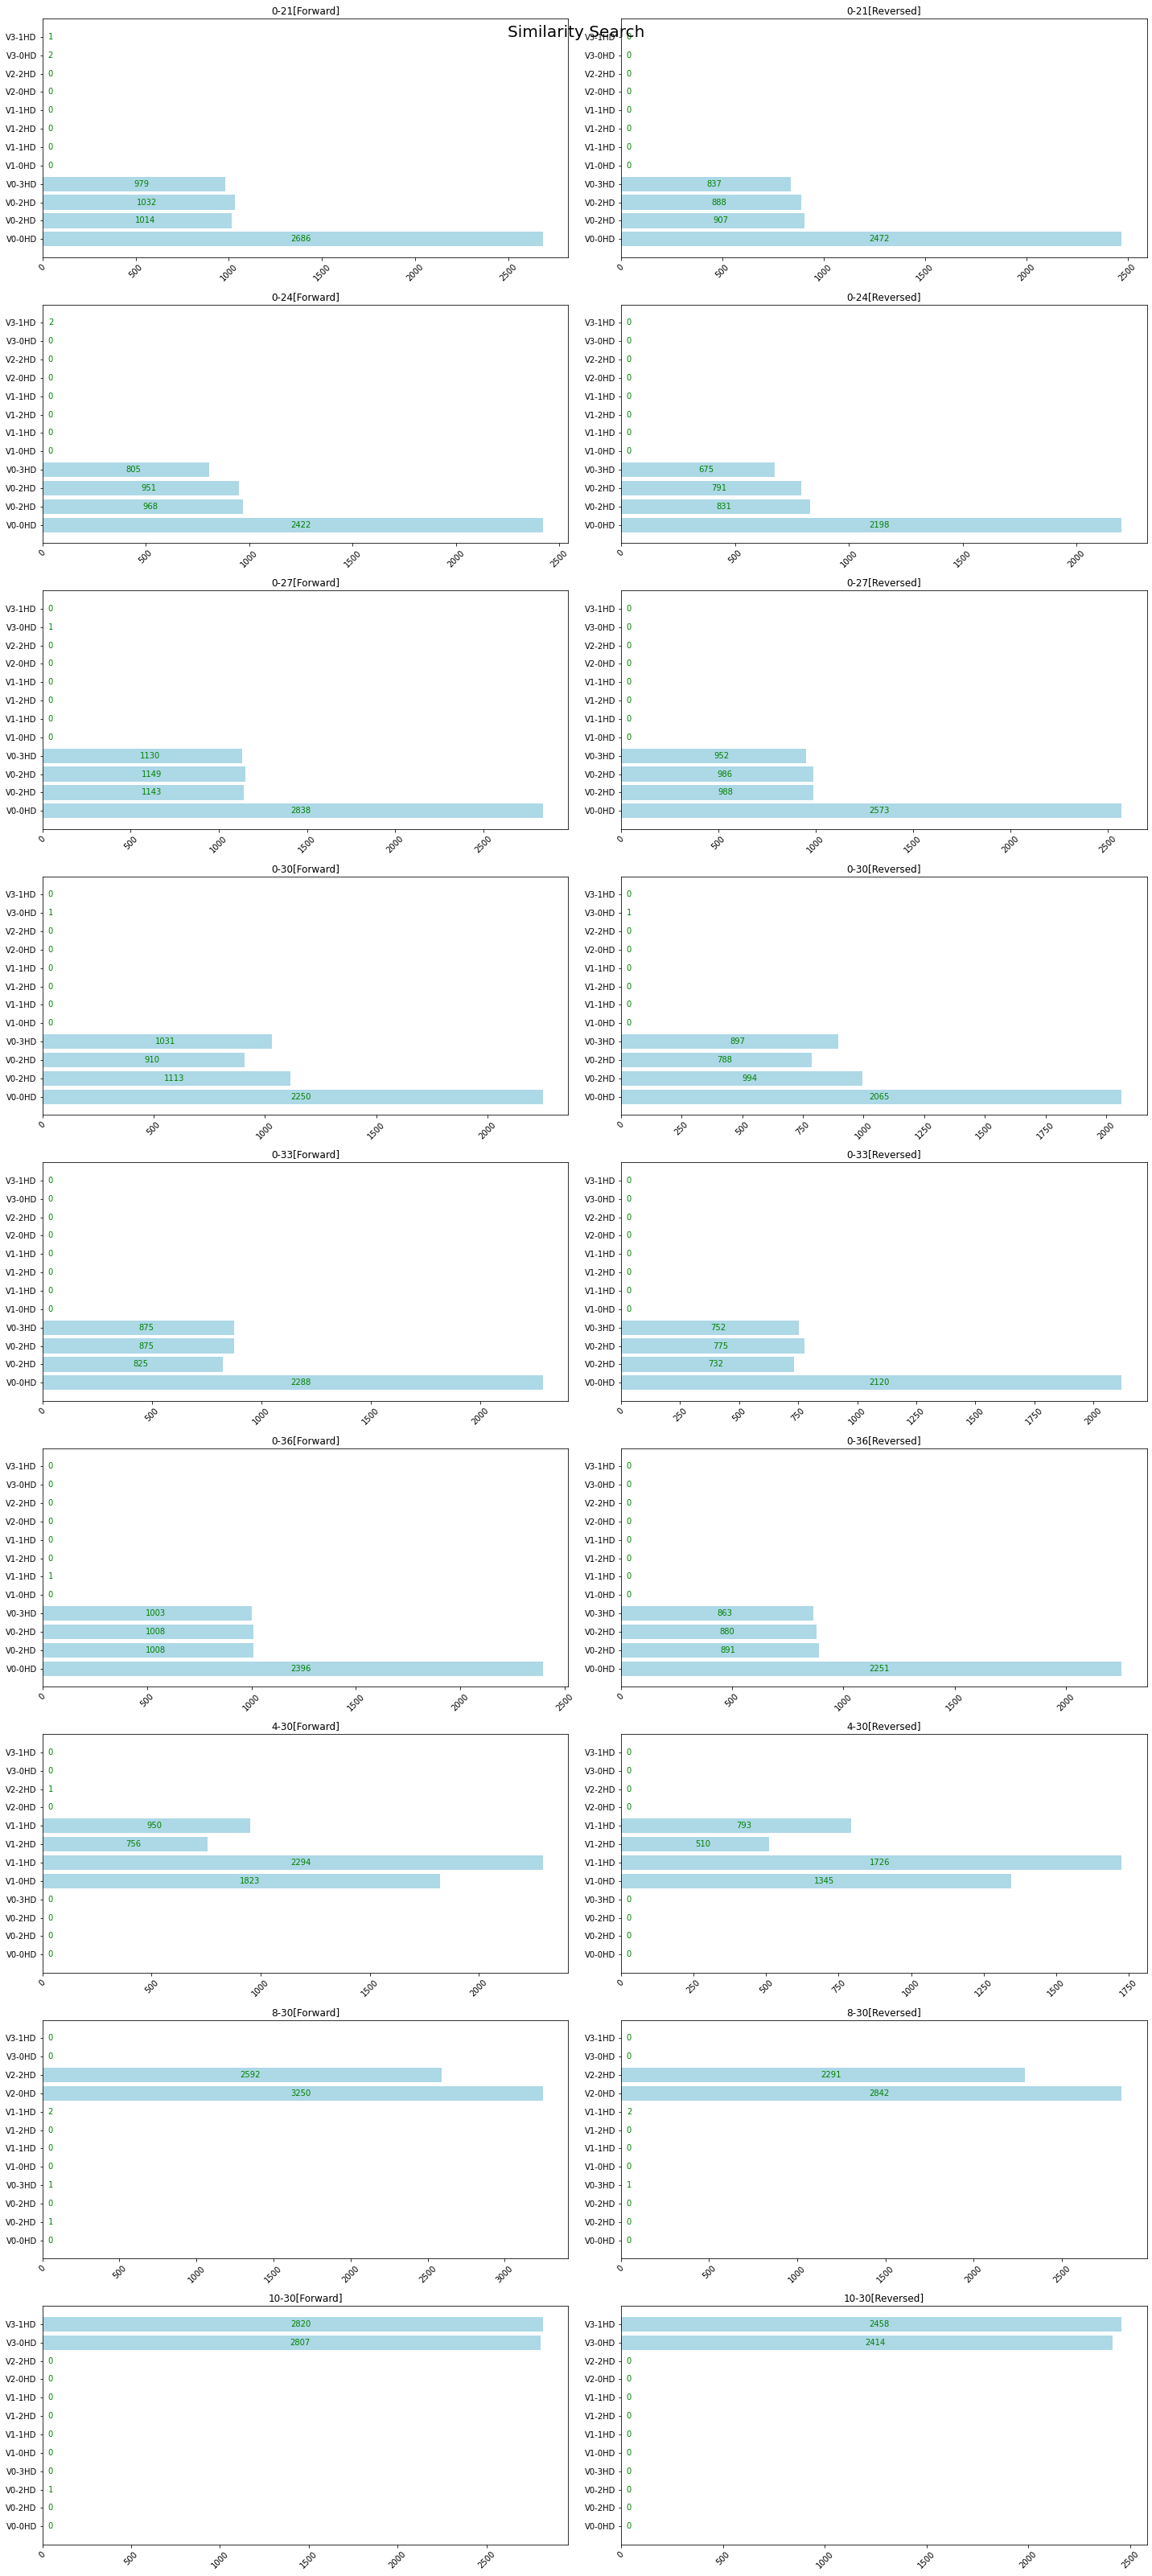

In [9]:
import os
import mappy as mp
import operator
import matplotlib.pyplot as plt
import numpy as np

f_path = "fastq/" + DES_FOLDER + "/f"
r_path = "fastq/" + DES_FOLDER + "/r"

all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]

ffs = os.listdir(f_path)
total_f_count = 0
for file in ffs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_f_count += 1
    else:
        continue
rfs = os.listdir(r_path)
total_r_count = 0
for file in rfs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_r_count += 1
    else:
        continue

print(all_f_seq_counts)

# barh = plt.barh(range(len(symbles)), all_f_seq_counts, tick_label=symbles, color='lightblue')
plt.figure(figsize=(20,5*total_f_count)) 

idxs = ["0-21", "0-24", "0-27", "0-30", "0-33", "0-36", "4-30", "8-30", "10-30"]
for file_index in range(total_f_count):
    print(file_index)
    all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]
    all_r_seq_counts = [0 for _ in range(len(all_r_seqs))]
    
    mp_data = mp.fastx_read(f_path + "/" + idxs[file_index]  + ".fq", read_comment=True)
    mp_data_r = mp.fastx_read(r_path + "/"+ idxs[file_index]  + ".fq", read_comment=True)
    read_count = 0

    for read in mp_data:
        for seq in all_f_seqs:
            if operator.contains(read[1], seq):
                all_f_seq_counts[all_f_seqs.index(seq)] += 1
    read_count += 1
    plt.subplot(total_f_count, 2, (file_index)*2 + 1)
    barh = plt.barh(range(len(symbles)), all_f_seq_counts, tick_label=symbles, color='lightblue')
    plt.bar_label(barh, label_type="center", color='green', padding=10)
    plt.xticks(rotation=45)
    plt.title(idxs[file_index] + "[Forward]")
        
    for read in mp_data_r:
        for seq in all_r_seqs:
            if operator.contains(read[1], seq):
                all_r_seq_counts[all_r_seqs.index(seq)] += 1
        
    plt.subplot(total_f_count, 2, (file_index+1)*2)
    barh = plt.barh(range(len(symbles)), all_r_seq_counts, tick_label=symbles, color='lightblue')
    plt.bar_label(barh, label_type="center", color='green', padding=10)
    plt.xticks(rotation=45)
    plt.title(idxs[file_index] + "[Reversed]")

plt.suptitle("Similarity Search", fontsize=20)
plt.tight_layout()
plt.savefig("fig.jpg", dpi=400)
plt.show()


# 结果绘图

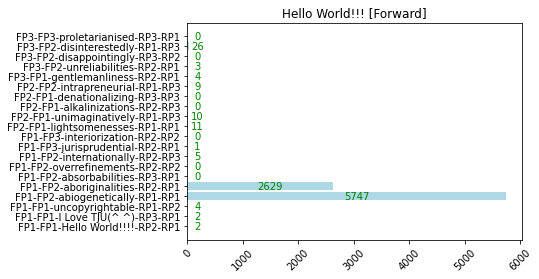

In [23]:
import matplotlib.pyplot as plt
import numpy as np

barh = plt.barh(range(len(symbles)), all_f_seq_counts, tick_label=symbles, color='lightblue')
plt.bar_label(barh, label_type="center", color='green', padding=10)
plt.xticks(rotation=45)
#plt.figure(figsize=(30,40)) 
plt.title("Hello World!!! [Forward]")
fig = plt.gcf()
plt.show()
fig.tight_layout()
fig.savefig("fig.jpg", dpi=400)